<a href="https://colab.research.google.com/github/RahulBansal-24/Object-Recognition-AI/blob/main/Object_Recognition_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Object Recognition AI 🤖**

---



**1)Setup and Object detection on Image**

installing python libraries **ultralytics**(*official library for YOLO (You Only Look Once*)), **opencv**(*computer vision but in lighter version*), **matplotlib**(*visualizing data*) and **pillow**(*image loading, editing, and saving*), **streamlit**(*for building interactive web apps*), **pyngrok**(*creating temporary public URL*), **pandas**(*data analysis*)

In [1]:
!pip install -q opencv-python-headless matplotlib pillow streamlit ultralytics pyngrok pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.5 MB/s eta 0:00:00


importing YOLO from ultralytcis, cv2, matplotlib, Image from PIL, files from google colab

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


uploading the file in a dictionary format, converting uploaded filenames to list and extracting first file as required

In [3]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print("Uploaded :",filename)

Saving scene.jpg to scene.jpg
Uploaded : scene.jpg


Loading the pretrained YOLOv8-nano model into memory and returning a YOLO model object

In [4]:
model = YOLO('yolov8n.pt')

processing the image using the model and Returning an annotated image array(image with boxes drawn on it)

In [5]:
result = model(filename)
annotated = result[0].plot()


image 1/1 /content/scene.jpg: 448x640 1 person, 1 bicycle, 8 cars, 1 traffic light, 82.2ms
Speed: 11.4ms preprocess, 82.2ms inference, 412.1ms postprocess per image at shape (1, 3, 448, 640)


displaying the annotated image with boxes around objects and accuracy numbers


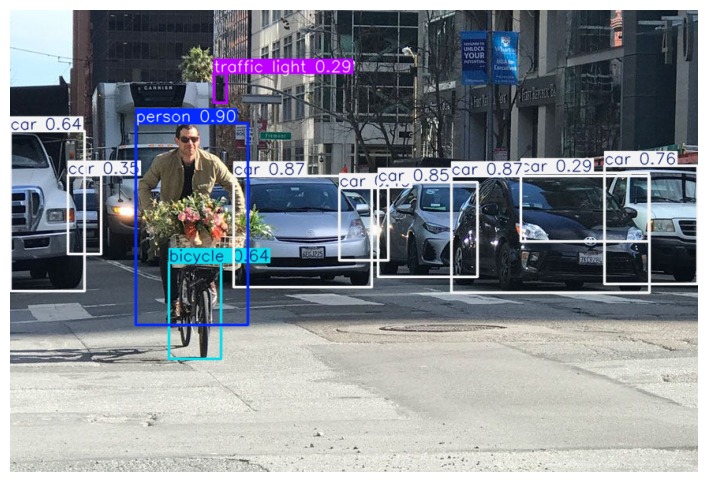

In [6]:
plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB)) #to convert BGR colored image into RGB for natural colour display
plt.axis('off')
plt.show()

**2) Object detection on video**

uploading video and extracting it similarly like image

In [7]:
vuploaded = files.upload()
videopath = list(vuploaded.keys())[0]
print("Uploaded :",videopath)

Saving japan.mp4 to japan.mp4
Uploaded : japan.mp4


defining the name, dimensions, fps, four character coding of output file and creating a VideoWriter object for storing output


In [8]:
outputpath = "result.mp4"
cap = cv2.VideoCapture(videopath)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS) or 25.0 #(or 25.0 is a fallback mechanism incase no fps is discovered)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(outputpath,fourcc,fps,(width,height))

reading and annotating video frame by frame and saving result in out object

In [9]:
fcount = 0
while True:
  ret, frame = cap.read() #reading input video frame by frame
  if not ret:
    break
  vresult = model(frame)
  vannotated = vresult[0].plot()
  out.write(vannotated)
  fcount+=1
  if fcount%100==0:
    print(f"processed {fcount} frames")
cap.release()
out.release()

print("Video Saved")
files.download(outputpath) #downloading annotated video

Streaming output truncated to the last 5000 lines.

0: 384x640 6 persons, 1 bicycle, 1 car, 7.6ms
Speed: 2.7ms preprocess, 7.6ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 1 bicycle, 1 car, 7.5ms
Speed: 1.9ms preprocess, 7.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 bicycle, 1 car, 7.6ms
Speed: 2.9ms preprocess, 7.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 car, 1 umbrella, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 1 car, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 1 bicycle, 2 cars, 8.9ms
Speed: 1.4ms preprocess, 8.9ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 bicycle, 2 cars, 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 4.8ms post

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**3) Object Detection in Live Webcam**

importing b64decode from base64 python module for converting Base64-encoded text back into its original binary data
and output from google colab

In [10]:
from base64 import b64decode
from google.colab import output

creating a python function that includes a block of javascript code for accessing webcam in google colab and taking a capture for object detection through a button,

In [11]:
def take_photo(filename='snapshot.jpg'):
  js = """
    async function takePhoto() {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      document.body.appendChild(div);

      const video = document.createElement('video');
      video.style.display = 'block';
      video.style.transform = 'scaleX(-1)';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();

      //Resize window
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      //Wait for Capture button
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;

      const ctx = canvas.getContext('2d');
      ctx.translate(canvas.width, 0);
      ctx.scale(-1, 1);
      ctx.drawImage(video, 0, 0);

      stream.getTracks().forEach(track => track.stop());
      const imgData = canvas.toDataURL('image/jpeg').split(',')[1];
      div.remove();
      return imgData;
    }
    takePhoto();
    """

  data = output.eval_js(js) #running javascript in colab
  with open(filename, 'wb') as f:
    f.write(b64decode(data)) # converting base64 text to binary data and writing to jpeg file
  return filename

saving captured image and processing it through model, annotating and displaying results

Saved to snapshot.jpg

image 1/1 /content/snapshot.jpg: 480x640 2 persons, 1 cell phone, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)


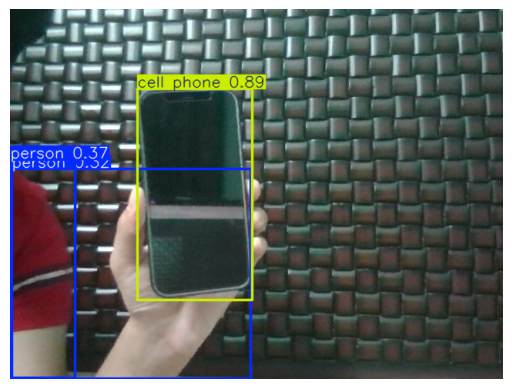

In [14]:
filename = take_photo('snapshot.jpg') #saving captured image as snapshot.jpg
print(f'Saved to {filename}')

#running yolo model on captured image and annotating results and displaying it
lresult = model(filename)
lannotated = lresult[0].plot()
plt.imshow(cv2.cvtColor(lannotated,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**4) YOLO Training on small dataset**

downloading coco128 subset of **coco**(*Common Objects in Context*) dataset

In [15]:
!curl -L "https://github.com/ultralytics/assets/releases/download/v0.0.0/coco128.zip" -o coco128.zip
!unzip -q coco128.zip -d dataset
!ls dataset/coco128

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  9373k      0 --:--:-- --:--:-- --:--:-- 9373k
images	labels	LICENSE  README.txt


configuring a dataset for YOLO training

In [16]:
%%writefile dataset/coco128/data.yaml
path: dataset/coco128 #root path
train: images/train2017 #training dataset
val: images/train2017 #validation dataset

names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: dining table
  61: toilet
  62: tv
  63: laptop
  64: mouse
  65: remote
  66: keyboard
  67: cell phone
  68: microwave
  69: oven
  70: toaster
  71: sink
  72: refrigerator
  73: book
  74: clock
  75: vase
  76: scissors
  77: teddy bear
  78: hair drier
  79: toothbrush

nc: 80 #number of classes

Writing dataset/coco128/data.yaml


creating another model object for training

In [17]:
trained_model = YOLO('yolov8n.pt')
trained_model.train(
    data="/content/dataset/coco128/data.yaml",
    epochs = 10, imgsz = 640,
    project = "YOLO_Training",
    name = "yolov8n_custom"
  )

Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/coco128/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ad34e55edb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

checking results

In [18]:
tresult = trained_model.predict("/content/dataset/coco128/images/train2017/000000000089.jpg",save=True)


image 1/1 /content/dataset/coco128/images/train2017/000000000089.jpg: 480x640 9 knifes, 1 microwave, 2 ovens, 1 book, 10.0ms
Speed: 1.6ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict


displaying annotated result

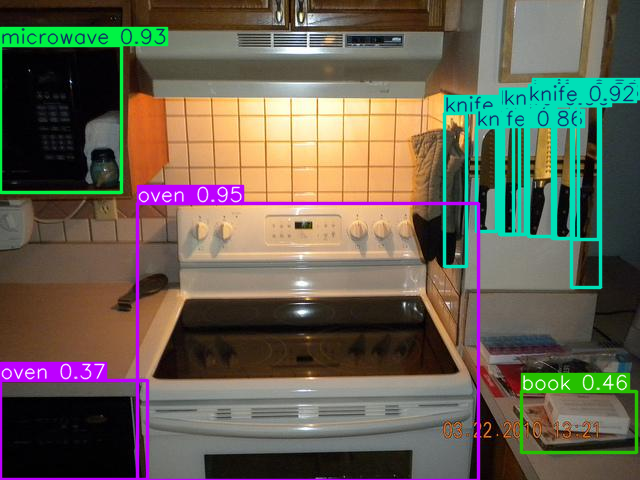

In [19]:
tresult[0].show()

**5) Deploy with a Streamlit UI**

creating a python file for streamlit app

In [20]:
%%writefile app_streamlit.py
import streamlit as st, numpy as np, tempfile, os, glob, pandas as pd
from pathlib import Path
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

#configuring streamlit app and giving it styling

st.set_page_config(page_title="Object Recognition AI 🤖", layout="wide")
background_url = "https://github.com/RahulBansal-24/Object-Recognition-AI/raw/main/background.png" #backround image hosted in github

st.title("Object Recognition AI 🤖")

st.markdown(
    f"""
    <style>
    .stApp {{
      background: url("{background_url}") no-repeat center center fixed;
      background-size: cover
    }}
    /* Sidebar styling */
    section[data-testid="stSidebar"]{{
      background: rgba(0,0,0,0.3);
      backdrop-filter: blur(10px);
      border-radius: 12px;
      padding: 10px;
    }}
    /*File uploader styling*/
    div[data-testid="stFileUploader"] {{
      background: rgba(0,0,0,0.3);
      backdrop-filter: blur(10px);
      border-radius: 12px;
      padding: 15px;
    }}
    /*DataFrame styling*/
    .stDataFrame {{
      background: rgba(255,255,255,0.85);
      border-radius: 12px;
      padding: 10px;
      box-shadow: 0 4px 10px rgba(0,0,0,0.3);
    }}
    /*Dark Text*/
    h1, h2, h3, h4, h5, h6, p, label, span, div {{
      color: #1a1a1a !important;
      font-weight: 500;
    }}
    </style>
    """,
    unsafe_allow_html=True
)

#creating sidebar slider and image box, defining functions for loading model and saving uploaded file

uploaded_weights = st.sidebar.file_uploader("Upload custom model .pt weights (optional)", type=["pt"])
conf = st.sidebar.slider("Confidence Threshold", 0.0, 1.0, 0.25, 0.01)
img_size = st.sidebar.selectbox("Inference image size (px)", [320,416,640,1280], index=2)

@st.cache_resource
def load_model(weights_path="yolov8n.pt"):
  return YOLO(weights_path)

def save_uploaded_file(uploaded_file, suffix=""):
  suffix = suffix if suffix else Path(uploaded_file.name).suffix
  tf = tempfile.NamedTemporaryFile(delete=False, suffix=suffix)
  tf.write(uploaded_file.getbuffer())
  tf.flush()
  return tf.name

#defining a function for annotating results on image

def annotate_and_table(results, model):
  res = results[0]
  try:
    plotted = res.plot()
    annotated = cv2.cvtColor(plotted, cv2.COLOR_BGR2RGB)
  except Exception:
    annotated = res.orig_img if hasattr(res, "orig_img") else None

  detections = []
  try:
    boxes = res.boxes
    if boxes is not None and len(boxes) > 0:
      for c, cf, box in zip(boxes.cls.cpu().numpy(), boxes.conf.cpu().numpy(), boxes.xyxy.cpu().numpy()):
        name = model.names[int(c)]
        detections.append({"class":name, "conf":  float(cf), "bbox": [float(x) for x in box]})
  except:
    detections = []

  return annotated, pd.DataFrame(detections)

#I/O and processing

weights_to_load = "yolov8n.pt"
if uploaded_weights:
  weights_to_load = save_uploaded_file(uploaded_weights, suffix=".pt")
  st.sidebar.success("Using uploaded weights")

model = load_model(weights_to_load)

mode = st.radio("Select input", ["Image upload", "Video upload"])

#Image upload case
if mode == "Image upload":
  uploaded = st.file_uploader("Upload image", type=["jpg", "jpeg", "png"])
  if uploaded:
    img = Image.open(uploaded).convert("RGB")
    st.image(img, caption="Input Image")
    results = model.predict(np.array(img), conf=conf, imgsz=img_size)
    annotated, df = annotate_and_table(results, model)
    if annotated is not None:
      annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
      st.image(annotated_rgb, caption="Annotated")
    if not df.empty:
      st.dataframe(df)
#Video upload case
elif mode == "Video upload":
  uploaded_vid = st.file_uploader("Upload video", type=["mp4","mov","avi","mkv"])
  if uploaded_vid:
    tmp = save_uploaded_file(uploaded_vid)
    st.video(tmp)
    project_dir = tempfile.mkdtemp()
    results = model.predict(source=tmp, conf=conf, imgsz=img_size, project=project_dir,name="run", save=True)
    try:
      out_dir = str(results[0].save_dir)
      vids = glob.glob(os.path.join(out_dir, "*"))
      vids = [v for v in vids if Path(v).suffix.lower() in [".mp4",".avi",".mov",".mkv"]]
      if vids:
        st.success("Annotated video")
        st.video(vids[0])
    except:
      st.warning("Could not display annotated video")

Writing app_streamlit.py


Using ngrok to host streamlit app

In [21]:
#importing ngrok from pyngrok library
from pyngrok import ngrok

NGROK_AUTH_TOKEN = "****************" #put your unique ngrok authorization token here
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

public_url = ngrok.connect(8501)
print("Public URL:", public_url)

!streamlit run app_streamlit.py --server.port 8501 &

#to keep the cell running
import time
while True:
  time.sleep(60)

Public URL: NgrokTunnel: "https://xenia-unjudiciable-nonebulliently.ngrok-free.dev" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.213.141:8501


0: 448x640 1 zebra, 52.0ms
Speed: 2.7ms preprocess, 52.0ms inference, 112.8ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 4 persons, 46.6ms
Speed: 2.3ms preprocess, 46.6ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 16 persons, 1 motorcycle, 2 buss, 1 backpack, 47.5ms
Speed: 1.7ms preprocess, 47.5ms inference, 9.4ms postprocess per image at shape (1, 3, 480, 640)


  Stopping...


KeyboardInterrupt: 